#Import module

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt
import math

from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, classification_report

from sklearn import tree

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tugas Sains Data/Tugas akhir sains data/Loan_default.csv")
df = df.drop(['LoanID'], axis = 1)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

None

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


#Data Preprocessing

In [ ]:
df_cols = df.columns
print(df_cols)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')


In [ ]:
float_col = list(df.select_dtypes(exclude="object").columns)
obj_col = list(df.select_dtypes("object").columns)
df_float_data = df[float_col]
df_obj_data = df[obj_col]
display(df_float_data.describe())
print("\n")
display(df_obj_data.describe())

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


## Missing values check

In [ ]:
data_stat = pd.DataFrame()
data_stat.index = df.columns
data_stat["missing_sum"] = df.isna().sum()
data_stat["missing_rate"] = df.isna().mean()
data_stat["dtype"] = df.dtypes
data_stat
#karena tidak ada missing values, jadi ngga perlu imputasi

,missing_sum,missing_rate,dtype
Age,0,0.0,int64
Income,0,0.0,int64
LoanAmount,0,0.0,int64
CreditScore,0,0.0,int64
MonthsEmployed,0,0.0,int64
NumCreditLines,0,0.0,int64
InterestRate,0,0.0,float64
LoanTerm,0,0.0,int64
DTIRatio,0,0.0,float64
Education,0,0.0,object


## Encoding data

karena ada data kategorik, maka harus di encoding dulu

In [ ]:
#df2_onehot = pd.get_dummies(df, columns = obj_col, dtype=int)
#display(df2_onehot)

In [ ]:
df.select_dtypes("object").columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2_onehot = df.copy()

for kolom in list(df.select_dtypes("object").columns):
  df2_onehot[kolom] = le.fit_transform(df2_onehot[kolom])
  keys = le.classes_
  values = le.transform(le.classes_)
  dictionary = dict(zip(keys, values))
  print(kolom)
  print(dictionary)

display(df2_onehot)

Education
{"Bachelor's": 0, 'High School': 1, "Master's": 2, 'PhD': 3}
EmploymentType
{'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3}
MaritalStatus
{'Divorced': 0, 'Married': 1, 'Single': 2}
HasMortgage
{'No': 0, 'Yes': 1}
HasDependents
{'No': 0, 'Yes': 1}
LoanPurpose
{'Auto': 0, 'Business': 1, 'Education': 2, 'Home': 3, 'Other': 4}
HasCoSigner
{'No': 0, 'Yes': 1}


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0,0


In [ ]:
df2_onehot['Default'] = df2_onehot['Default'].replace({0: 'Not Default', 1: 'Default'})

In [ ]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [ ]:
df2_onehot['Education'].unique()

array([0, 2, 1, 3])

## Standardization data

In [ ]:
# copy of datasets
df3 = df2_onehot.copy()

# apply standardization on numerical features
stand_cols = set(float_col) - set(['Default']) #Karena kita tidak perlu men standardisasi variabel target

for i in stand_cols:
    scale = StandardScaler() # fit on training data column
    df3[i] = scale.fit_transform(df3[[i]])  # transform the data column

df3

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,Not Default
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,Not Default
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,Default
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,Not Default
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783,0,0,1,0,0,4,0,Not Default
255343,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785,1,1,0,0,0,3,0,Default
255344,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918,1,2,1,1,1,0,1,Not Default
255345,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753,1,1,2,1,1,4,0,Not Default


In [ ]:
display(df3.info())
display(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   NumCreditLines  255347 non-null  float64
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  float64
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int64  
 10  EmploymentType  255347 non-null  int64  
 11  MaritalStatus   255347 non-null  int64  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int64  
 15  HasCoSigner     255347 non-null  int64  
 16  Default         255347 non-null  object 
dtypes: float64

None

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,-1.808726e-16,3.695367e-17,4.082156e-17,2.277882e-16,9.345549e-17,-4.499206e-17,-6.619937e-16,1.849770e-16,5.248088e-17,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001
min,-1.700995e+00,-1.732398e+00,-1.730348e+00,-1.725980e+00,-1.718715e+00,-1.343791e+00,-1.731770e+00,-1.415845e+00,-1.733149e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.337635e-01,-8.642522e-01,-8.670578e-01,-8.638217e-01,-8.527470e-01,-4.485487e-01,-8.623271e-01,-7.086855e-01,-8.670336e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-3.324207e-02,-8.547763e-04,-3.227743e-04,-1.663564e-03,1.322113e-02,-4.485487e-01,-4.938420e-03,-1.525943e-03,-9.183609e-04,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,8.339895e-01,8.654300e-01,8.668216e-01,8.667877e-01,8.791892e-01,4.466940e-01,8.675186e-01,7.056336e-01,8.651968e-01,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000
max,1.701221e+00,1.732408e+00,1.728108e+00,1.728946e+00,1.716292e+00,1.341937e+00,1.733948e+00,1.412793e+00,1.731312e+00,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000


# EDA

In [ ]:
df_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')



*   Distribusi data numerik



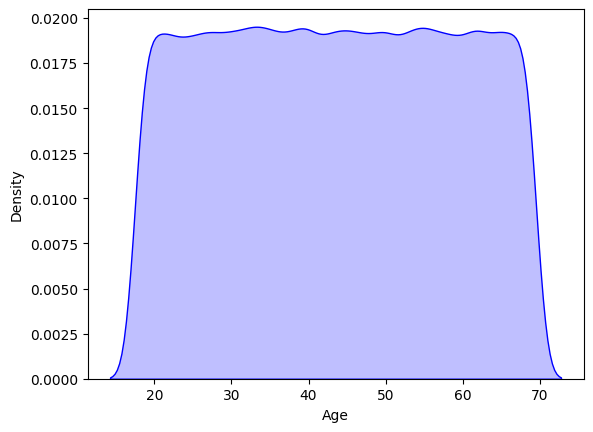

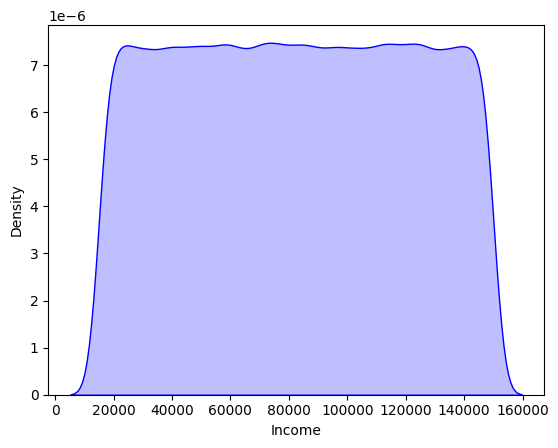

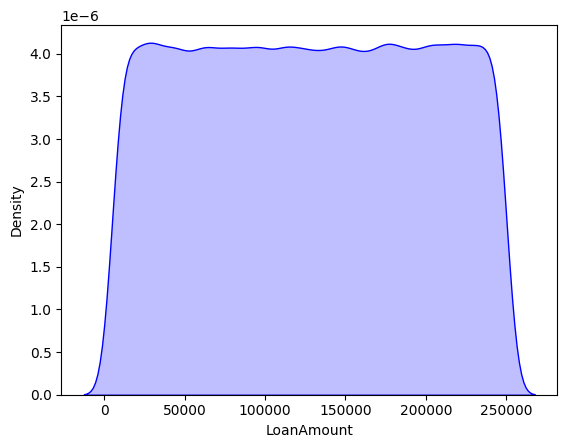

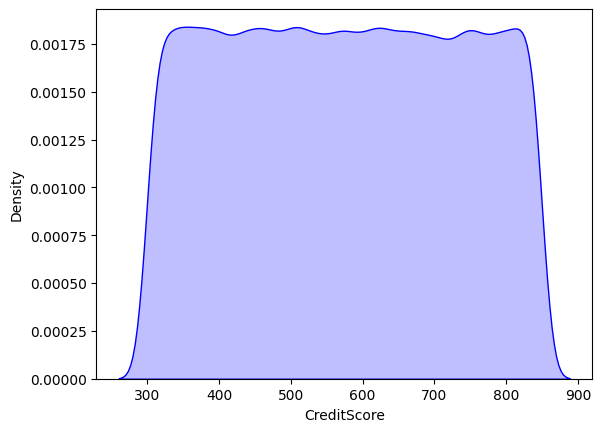

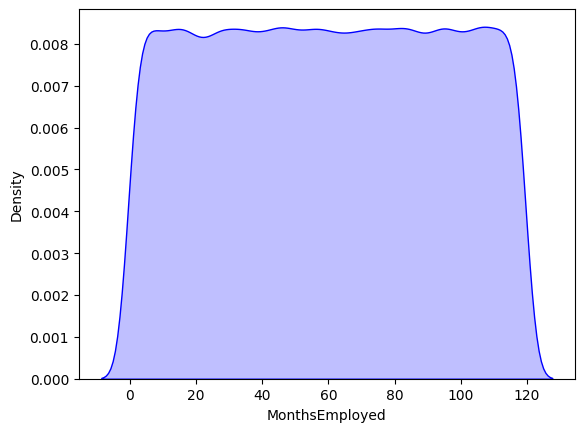

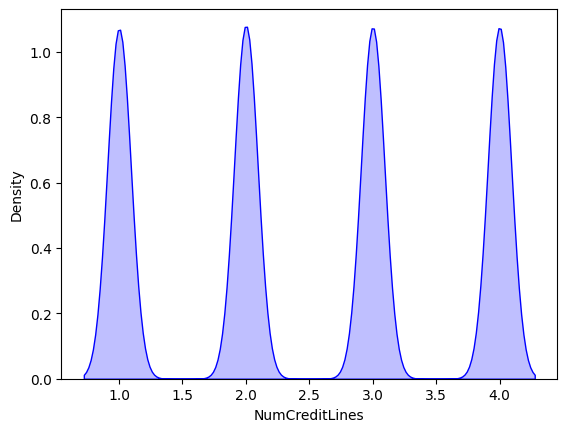

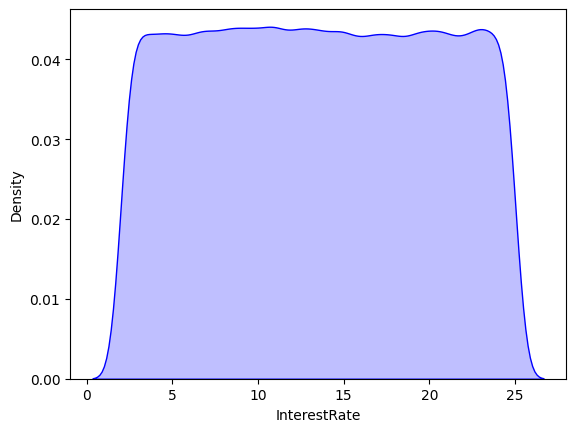

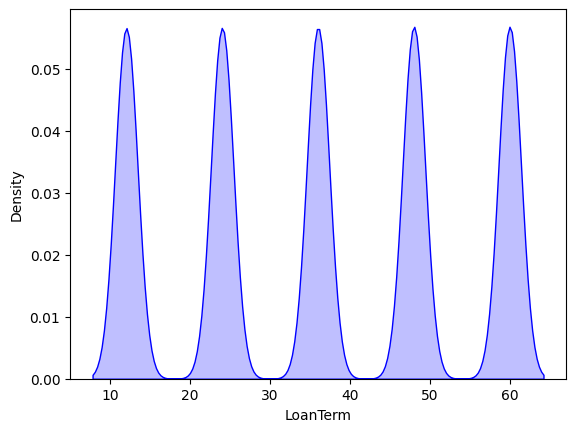

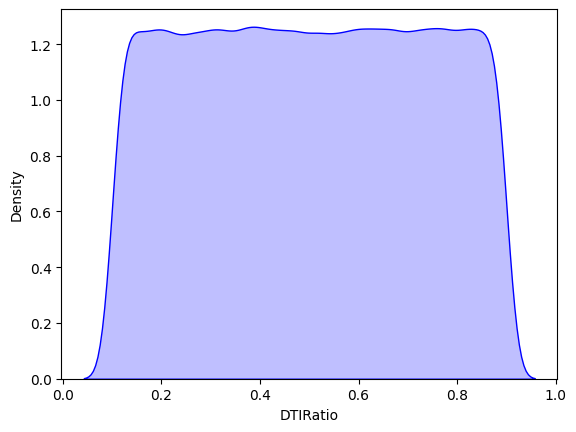

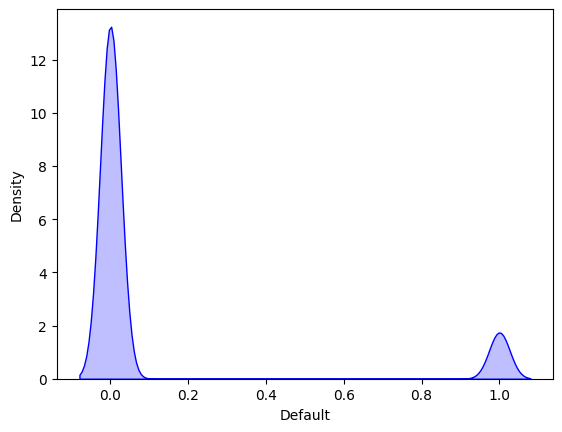

In [ ]:
for i in float_col:
  sns.kdeplot(df[i], fill=True, color="b")
  plt.show()

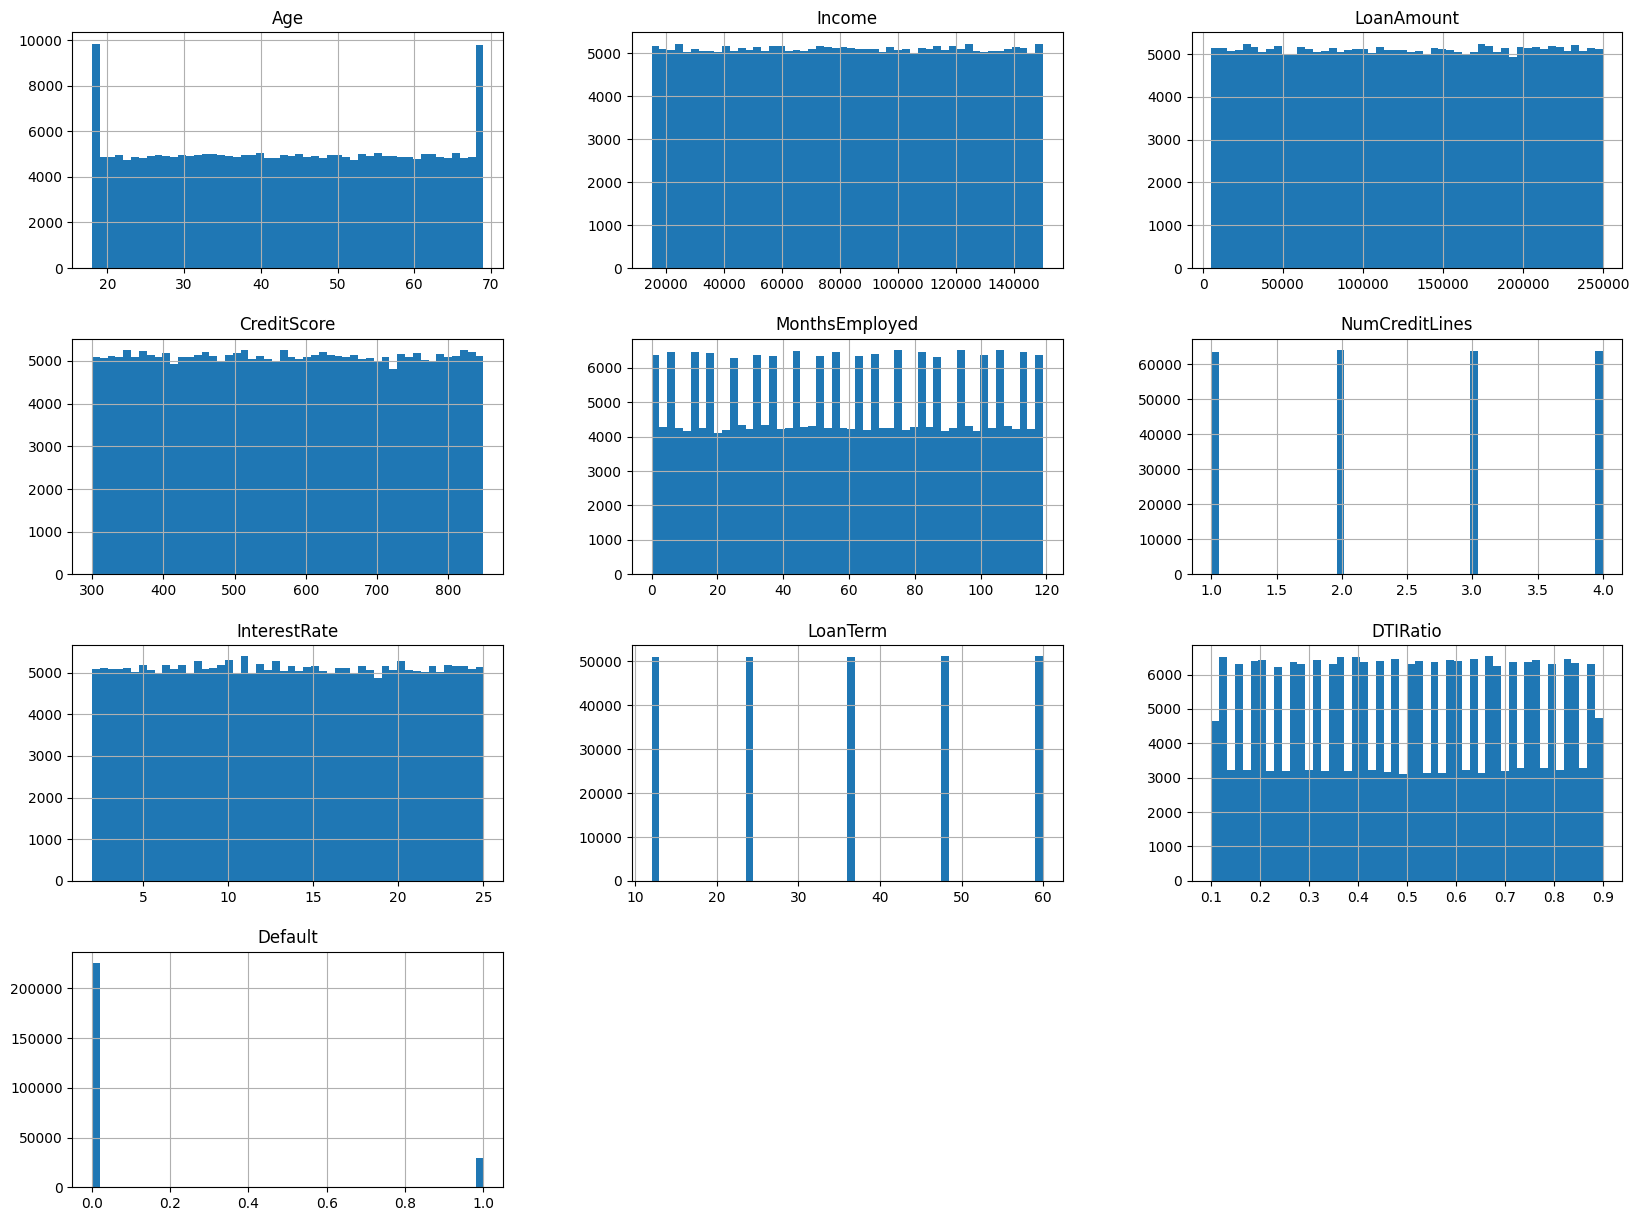

<Figure size 640x480 with 0 Axes>

In [ ]:
df[float_col].hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('histogram' +'.png')
#Distribusi data Numerik

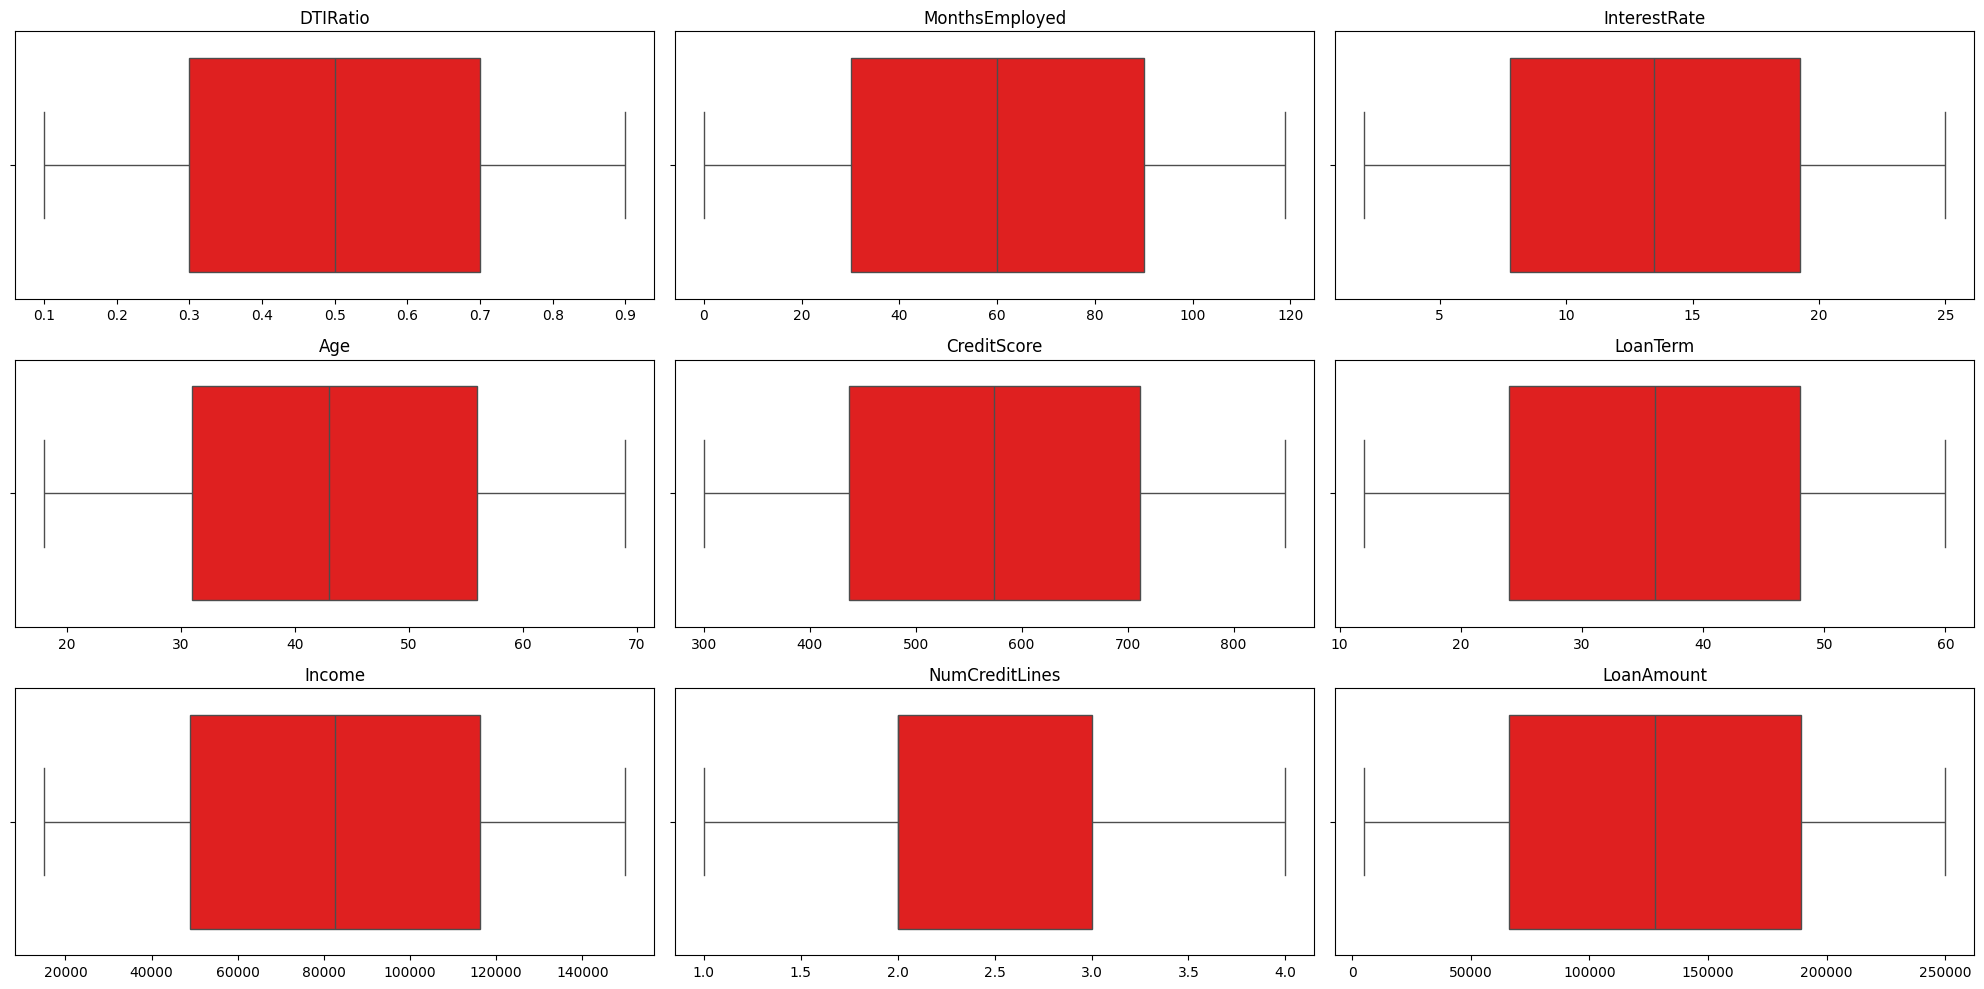

In [ ]:
plt.figure(figsize=(20, 10))
boxplot_col = set(float_col) - set(['Default'])

for  i, variable in enumerate(boxplot_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[variable],color="red")
    plt.title(variable)
    plt.xlabel('')

plt.tight_layout()
plt.show()



*   cek distirbusi box
*   gaada skew, dan gaada outlier



In [ ]:
X = df2_onehot.drop(['Default'], axis = 1)
y = df2_onehot.Default
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0


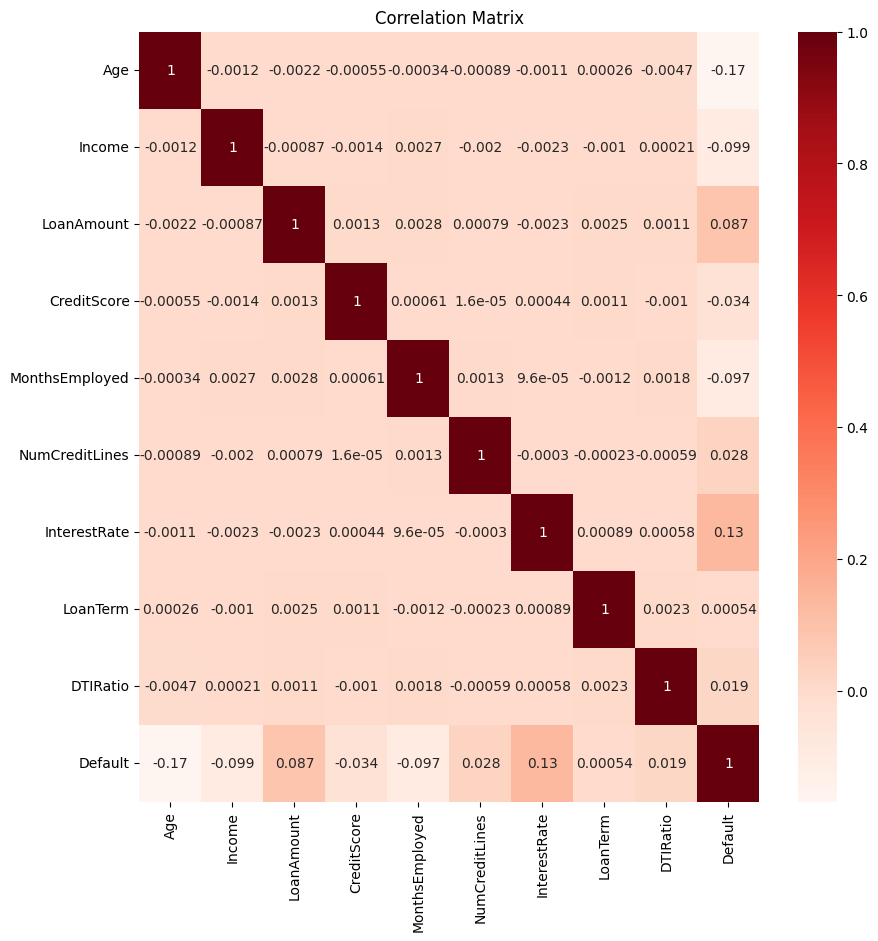

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[float_col].corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()



*   Default dan Interest rate berkorelasi positif (0.13).
*   Default dan Age berkorelasi negatif (-0.17).
*   "Credit Score" berkorelasi negatif dengan Loan default.



In [ ]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0


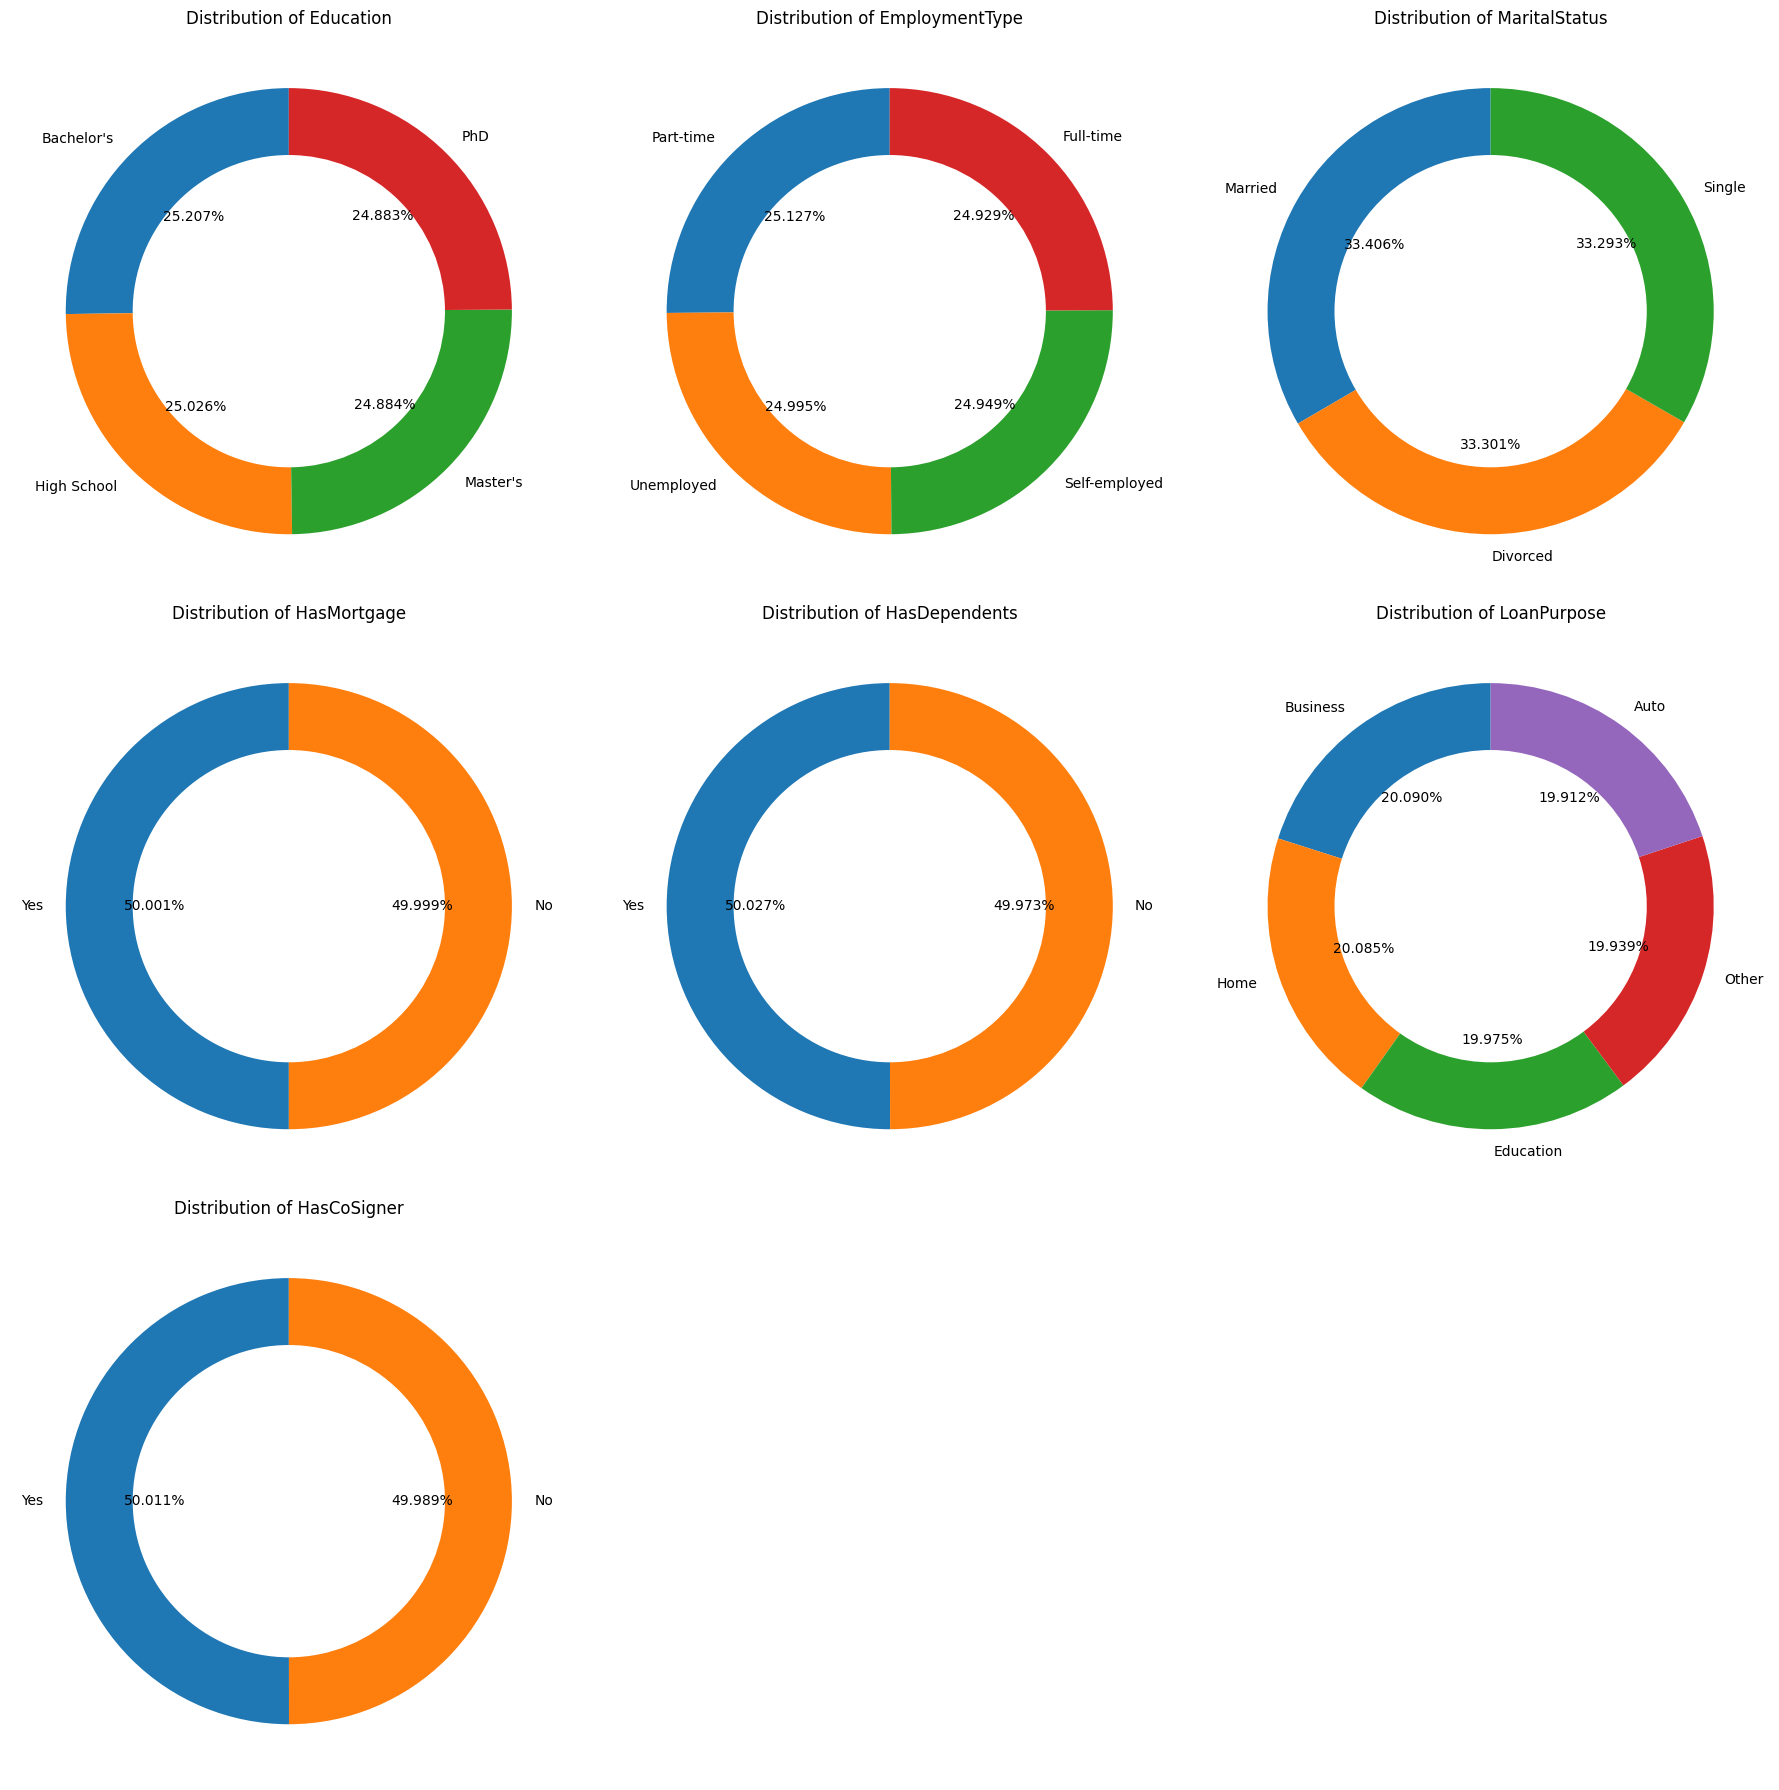

In [ ]:
plt.figure(figsize=(18, 18))

for i, column in enumerate(obj_col, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns based on your preference
    df[column].value_counts().plot.pie(autopct='%1.3f%%', startangle=90, wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')  # Hide the y-label for clarity

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()





*   pie plot menunjukkan persebaran nilai unik fitur-fitur kategorikal



In [ ]:
df2_onehot[['Default']].value_counts()

Default    
Not Default    225694
Default         29653
Name: count, dtype: int64

Text(0, 0.5, '')

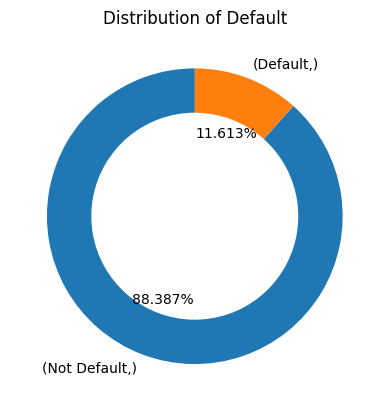

In [ ]:
df2_onehot[['Default']].value_counts().plot.pie(autopct='%1.3f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Default')
plt.ylabel('')  # Hide the y-label for clarity



*   Distribusi data target "Default" tidak seimbang



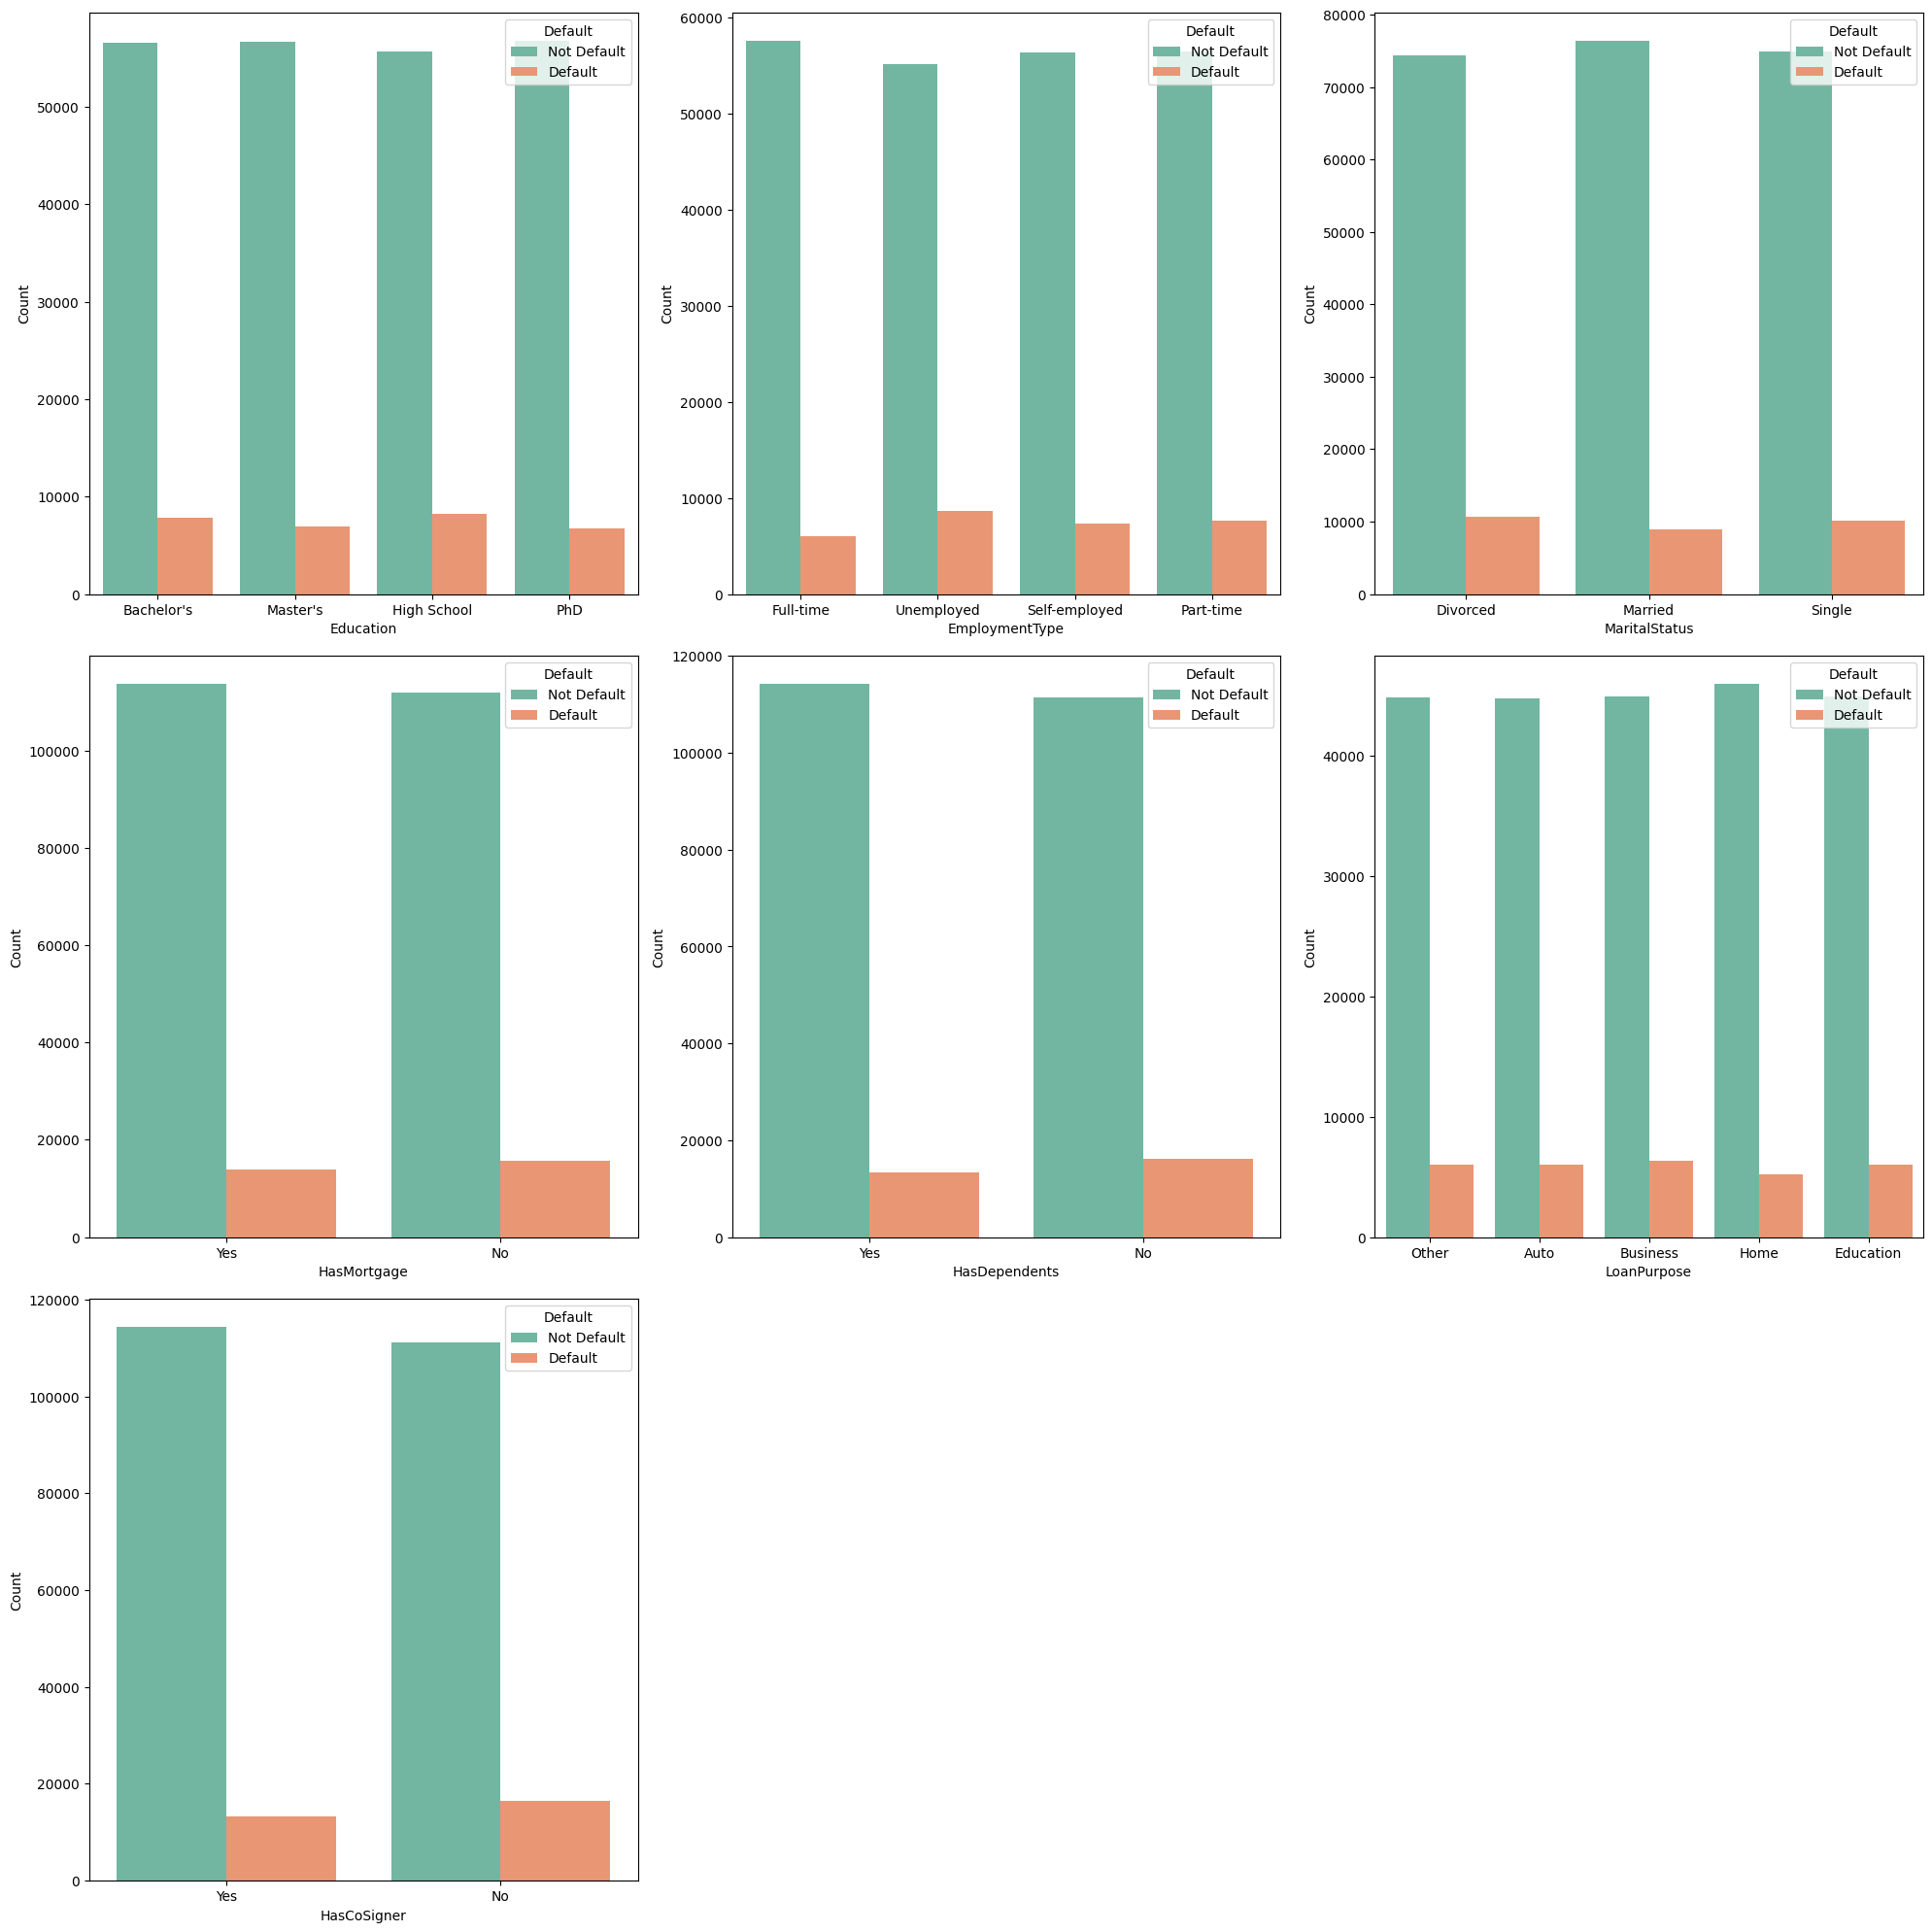

In [ ]:
#Comparing categorical variable with target
plt.figure(figsize=(20, 20))
ind=1
for i, variable in enumerate(obj_col, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=df[variable],palette='Set2',hue=df2_onehot["Default"])
    plt.ylabel('Count')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

# Training

In [ ]:
X = df3.drop(['Default'], axis = 1)
y = df3.Default
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783,0,0,1,0,0,4,0
255343,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785,1,1,0,0,0,3,0
255344,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918,1,2,1,1,1,0,1
255345,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753,1,1,2,1,1,4,0


In [ ]:
y

0         Not Default
1         Not Default
2             Default
3         Not Default
4         Not Default
             ...     
255342    Not Default
255343        Default
255344    Not Default
255345    Not Default
255346    Not Default
Name: Default, Length: 255347, dtype: object

In [ ]:
le2 = LabelEncoder()
y_le = le2.fit_transform(y)
y_le = pd.DataFrame(y_le)
y_le

,0
0,1
1,1
2,0
3,1
4,1
...,...
255342,1
255343,0
255344,1
255345,1


In [ ]:
result = []

## Decision Tree

In [ ]:
SEED = 42
X_train, X_val, y_train, y_val = train_test_split(X, y_le, random_state = SEED, stratify=y, test_size=0.3)
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
218588,1.367670,-0.306530,-0.086883,-0.895287,-0.362032,-0.448549,0.841902,1.412793,-1.126868,3,3,2,1,0,1,1
204293,-1.167314,-0.941954,0.615553,-1.543479,-1.054806,0.446694,0.010130,0.705634,-0.563893,0,3,1,0,1,3,1
171996,-0.700343,-0.039687,-1.599929,0.873081,-0.506360,0.446694,-0.714657,-0.708685,0.648668,1,1,2,1,1,4,1
170460,-0.633633,-0.774487,0.658297,0.086440,-0.997075,-1.343791,0.127663,0.705634,-1.213480,3,3,0,1,1,2,0
192381,1.300960,0.335593,-0.433902,-0.108647,0.013221,0.446694,0.391359,1.412793,-1.603231,3,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133402,-0.700343,1.128064,1.303619,0.879374,0.070952,1.341937,-0.720685,-0.001526,-0.217447,2,1,1,1,1,2,0
14547,0.500439,-0.076516,-1.312565,-1.625290,0.244146,1.341937,-0.717671,-0.708685,-0.174141,2,0,1,1,1,2,1
160050,-1.567575,-1.025085,-0.075294,0.117906,-1.372328,-0.448549,0.255744,0.705634,-0.953645,3,0,0,1,0,4,0
173612,-1.367444,-0.829078,-1.530054,0.703166,1.312173,-0.448549,-0.893971,-0.708685,0.215610,0,3,1,1,0,2,0


In [ ]:
dectree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = SEED)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

In [ ]:
y_pred_dectree = dectree.predict(X_val)
y_pred_dectree[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
acc = accuracy_score(y_val, y_pred_dectree)
f1 = f1_score(y_val, y_pred_dectree)
roc_auc = roc_auc_score(y_val, dectree.predict_proba(X_val)[:, 1])

print("accuracy score: ", acc)
print("f1 score: ", f1)
print("ROC-AUC score: ", roc_auc)

accuracy score:  0.8838718099340774
f1 score:  0.9383566389955237
ROC-AUC score:  0.6150155047836962


In [ ]:
result.append(['Decision Tree', acc, f1, roc_auc])
result

[['Decision Tree', 0.8838718099340774, 0.9383566389955237, 0.6150155047836962]]

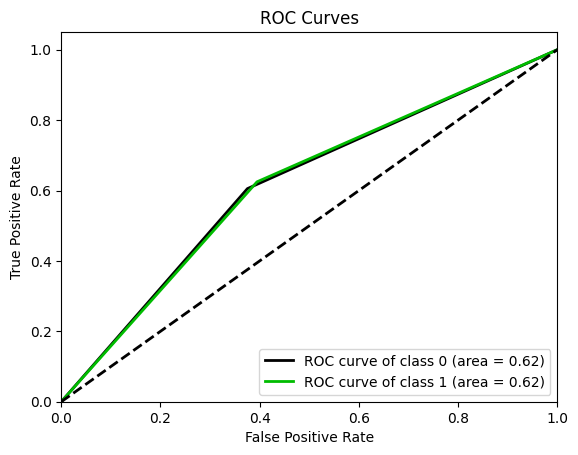

In [ ]:
skplt.metrics.plot_roc(y_val, dectree.predict_proba(X_val), plot_micro=False, plot_macro=False)
plt.show()

In [ ]:
cv_results = cross_validate(dectree,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.18073821, 0.16995668, 0.17158794, 0.17321062, 0.18386078]),
 'score_time': array([0.05930781, 0.0551548 , 0.05040288, 0.05217171, 0.04727221]),
 'test_accuracy': array([0.88385689, 0.88385689, 0.88388162, 0.88388162, 0.88388162]),
 'test_f1': array([0.93834823, 0.93834823, 0.93836216, 0.93836216, 0.93836216]),
 'test_roc_auc': array([0.61425641, 0.61738823, 0.61297939, 0.61571129, 0.61057453])}

In [ ]:
print(f"Nilai akurasi rata-rata cross-validation: {cv_results['test_accuracy'].mean()}")
print(f"Nilai f1 rata-rata cross-validation: {cv_results['test_f1'].mean()}")
print(f"Nilai roc-auc rata-rata cross-validation: {cv_results['test_roc_auc'].mean()}")

Nilai akurasi rata-rata cross-validation: 0.8838717258935762
Nilai f1 rata-rata cross-validation: 0.9383565915911707
Nilai roc-auc rata-rata cross-validation: 0.614181969671318


[Text(0.5, 0.75, 'Age <= -0.333\nentropy = 0.518\nsamples = 178742\nvalue = [20757, 157985]\nclass = Not Default'),
 Text(0.25, 0.25, 'entropy = 0.668\nsamples = 72345\nvalue = [12626, 59719]\nclass = Not Default'),
 Text(0.75, 0.25, 'entropy = 0.389\nsamples = 106397\nvalue = [8131, 98266]\nclass = Not Default')]

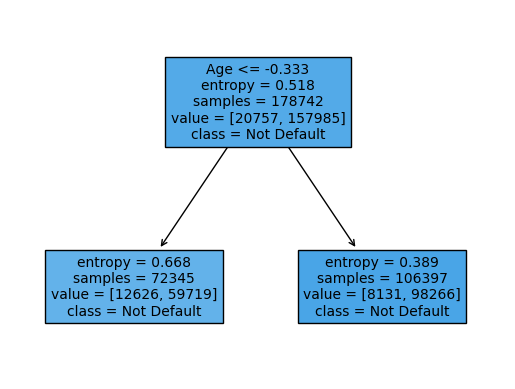

In [ ]:
featureNames = df3.columns

#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15, 20), dpi=300)
tree.plot_tree(dectree,
                       feature_names=featureNames,
                       class_names=["Default", "Not Default"],
                       max_depth = 4,
                       fontsize=10,
                       filled=True)

#plt.savefig('foo.png')
#plt.show()

In [ ]:
y_val_reverse = le2.inverse_transform(y_val)
y_pred_dectree_reverse = le2.inverse_transform(y_pred_dectree)
y_pred_dectree_reverse

array(['Not Default', 'Not Default', 'Not Default', ..., 'Not Default',
       'Not Default', 'Not Default'], dtype=object)

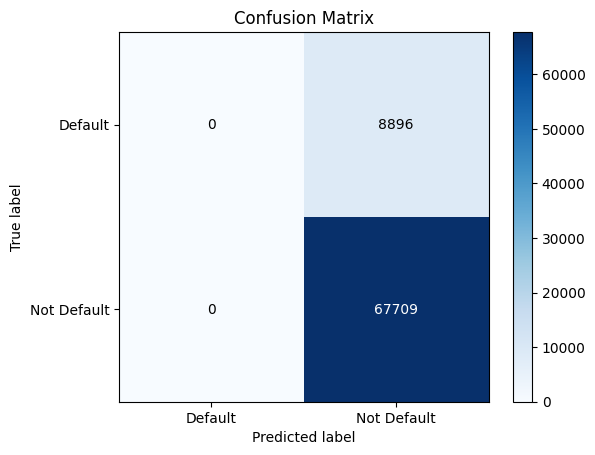

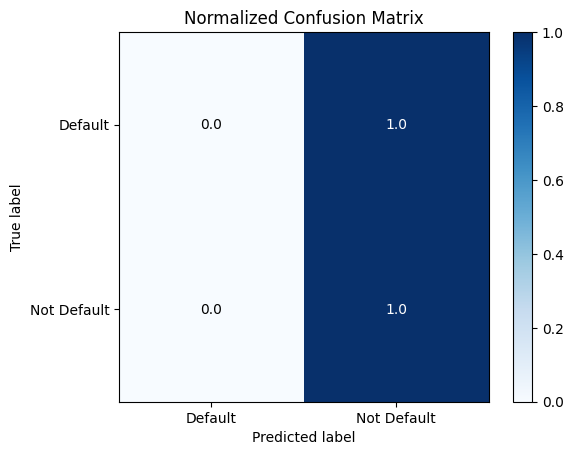

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val_reverse, y_pred_dectree_reverse, normalize=False)
plt.show()
skplt.metrics.plot_confusion_matrix(y_val_reverse, y_pred_dectree_reverse, normalize=True)
plt.show()

## Hyperparameter Tuning Decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dectree_stand_param_grid = {
    'max_depth': range(1, 10),
    "min_samples_split": range(2, 10),
    'min_samples_leaf': range(2,10)
}

dectree_grid_search = GridSearchCV(dectree, dectree_stand_param_grid, cv = 3,
                                   n_jobs = -1, verbose = 1, scoring='accuracy')
dectree_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy', verbose=1)

In [ ]:
# summarize all scores that were evaluated
means = dectree_grid_search.cv_results_['mean_test_score']
stds = dectree_grid_search.cv_results_['std_test_score']
params = dectree_grid_search.cv_results_['params']
dectree_grid_search_result = pd.DataFrame([means, stds, params]).T
dectree_grid_search_result = dectree_grid_search_result.rename(columns = {0:"mean_test_score", 1:"std_test_score", 2:'params'})
dectree_grid_search_result

,mean_test_score,std_test_score,params
0,0.883872,0.000001,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
1,0.883872,0.000001,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
2,0.883872,0.000001,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
3,0.883872,0.000001,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
4,0.883872,0.000001,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s..."
...,...,...,...
571,0.88273,0.000619,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s..."
572,0.88273,0.000619,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s..."
573,0.88273,0.000619,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s..."
574,0.88273,0.000619,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s..."


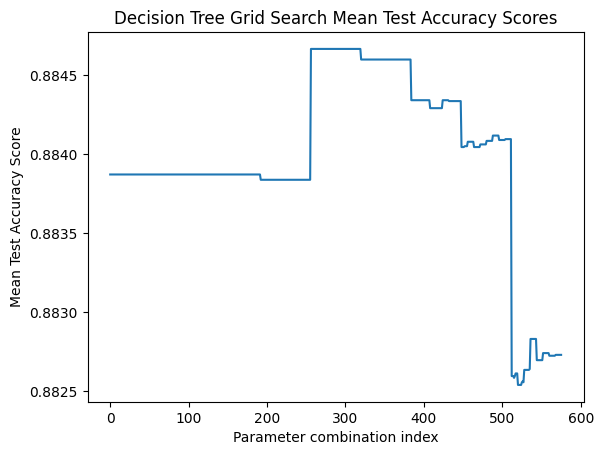

In [ ]:
plt.plot(dectree_grid_search_result['mean_test_score'])
plt.xlabel('Parameter combination index')
plt.ylabel('Mean Test Accuracy Score')
plt.title('Decision Tree Grid Search Mean Test Accuracy Scores')
plt.show()

In [ ]:
print(dectree_grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
dectree_hypetune = tree.DecisionTreeClassifier(criterion = 'entropy', **dectree_grid_search.best_params_, random_state = SEED)
dectree_hypetune.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

In [ ]:
y_pred_dectree_hypetune = dectree_hypetune.predict(X_val)
acc = accuracy_score(y_val, y_pred_dectree_hypetune)
f1 = f1_score(y_val, y_pred_dectree_hypetune)
roc_auc = roc_auc_score(y_val, dectree_hypetune.predict_proba(X_val)[:, 1])

print("accuracy score: ", acc)
print("f1 score: ", f1)
print("ROC-AUC score: ", roc_auc)

accuracy score:  0.8848247503426669
f1 score:  0.938701497203599
ROC-AUC score:  0.7134008376714422


In [ ]:
result.append(['Decision Tree with HyperTune', acc, f1, roc_auc])
result

[['Decision Tree', 0.8838718099340774, 0.9383566389955237, 0.6150155047836962],
 ['Decision Tree with HyperTune',
  0.8848247503426669,
  0.938701497203599,
  0.7134008376714422]]

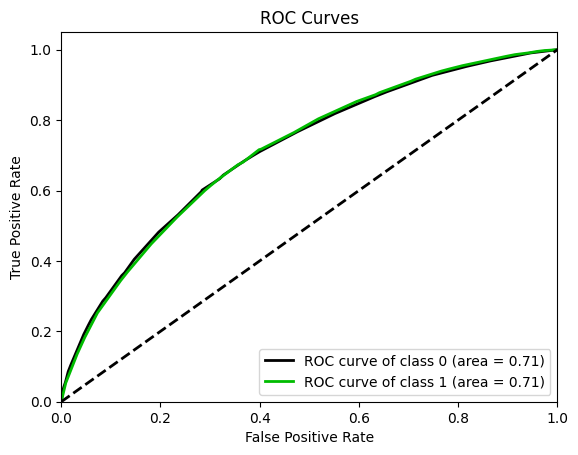

In [ ]:
skplt.metrics.plot_roc(y_val, dectree_hypetune.predict_proba(X_val),
                       plot_micro=False, plot_macro=False)
plt.show()

In [ ]:
y_pred_dectree_hypetune_reverse = le2.inverse_transform(y_pred_dectree_hypetune)
y_pred_dectree_hypetune_reverse

array(['Not Default', 'Not Default', 'Not Default', ..., 'Not Default',
       'Not Default', 'Not Default'], dtype=object)

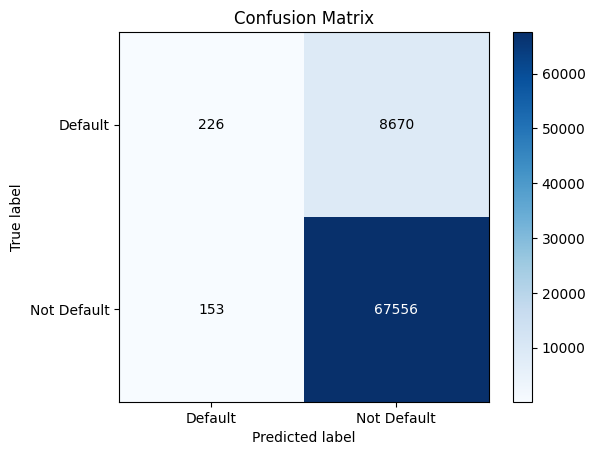

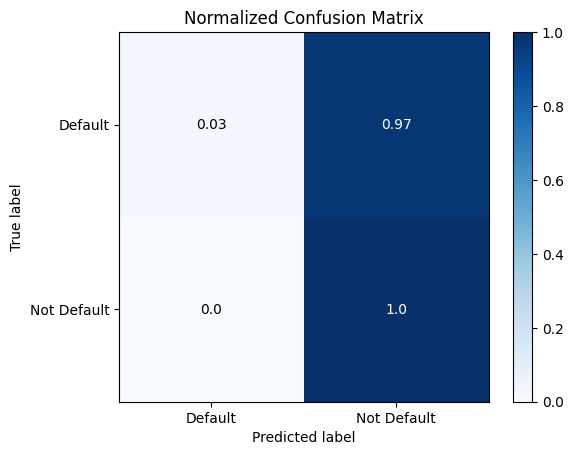

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val_reverse, y_pred_dectree_hypetune_reverse, normalize=False)
plt.show()
skplt.metrics.plot_confusion_matrix(y_val_reverse, y_pred_dectree_hypetune_reverse, normalize=True)
plt.show()

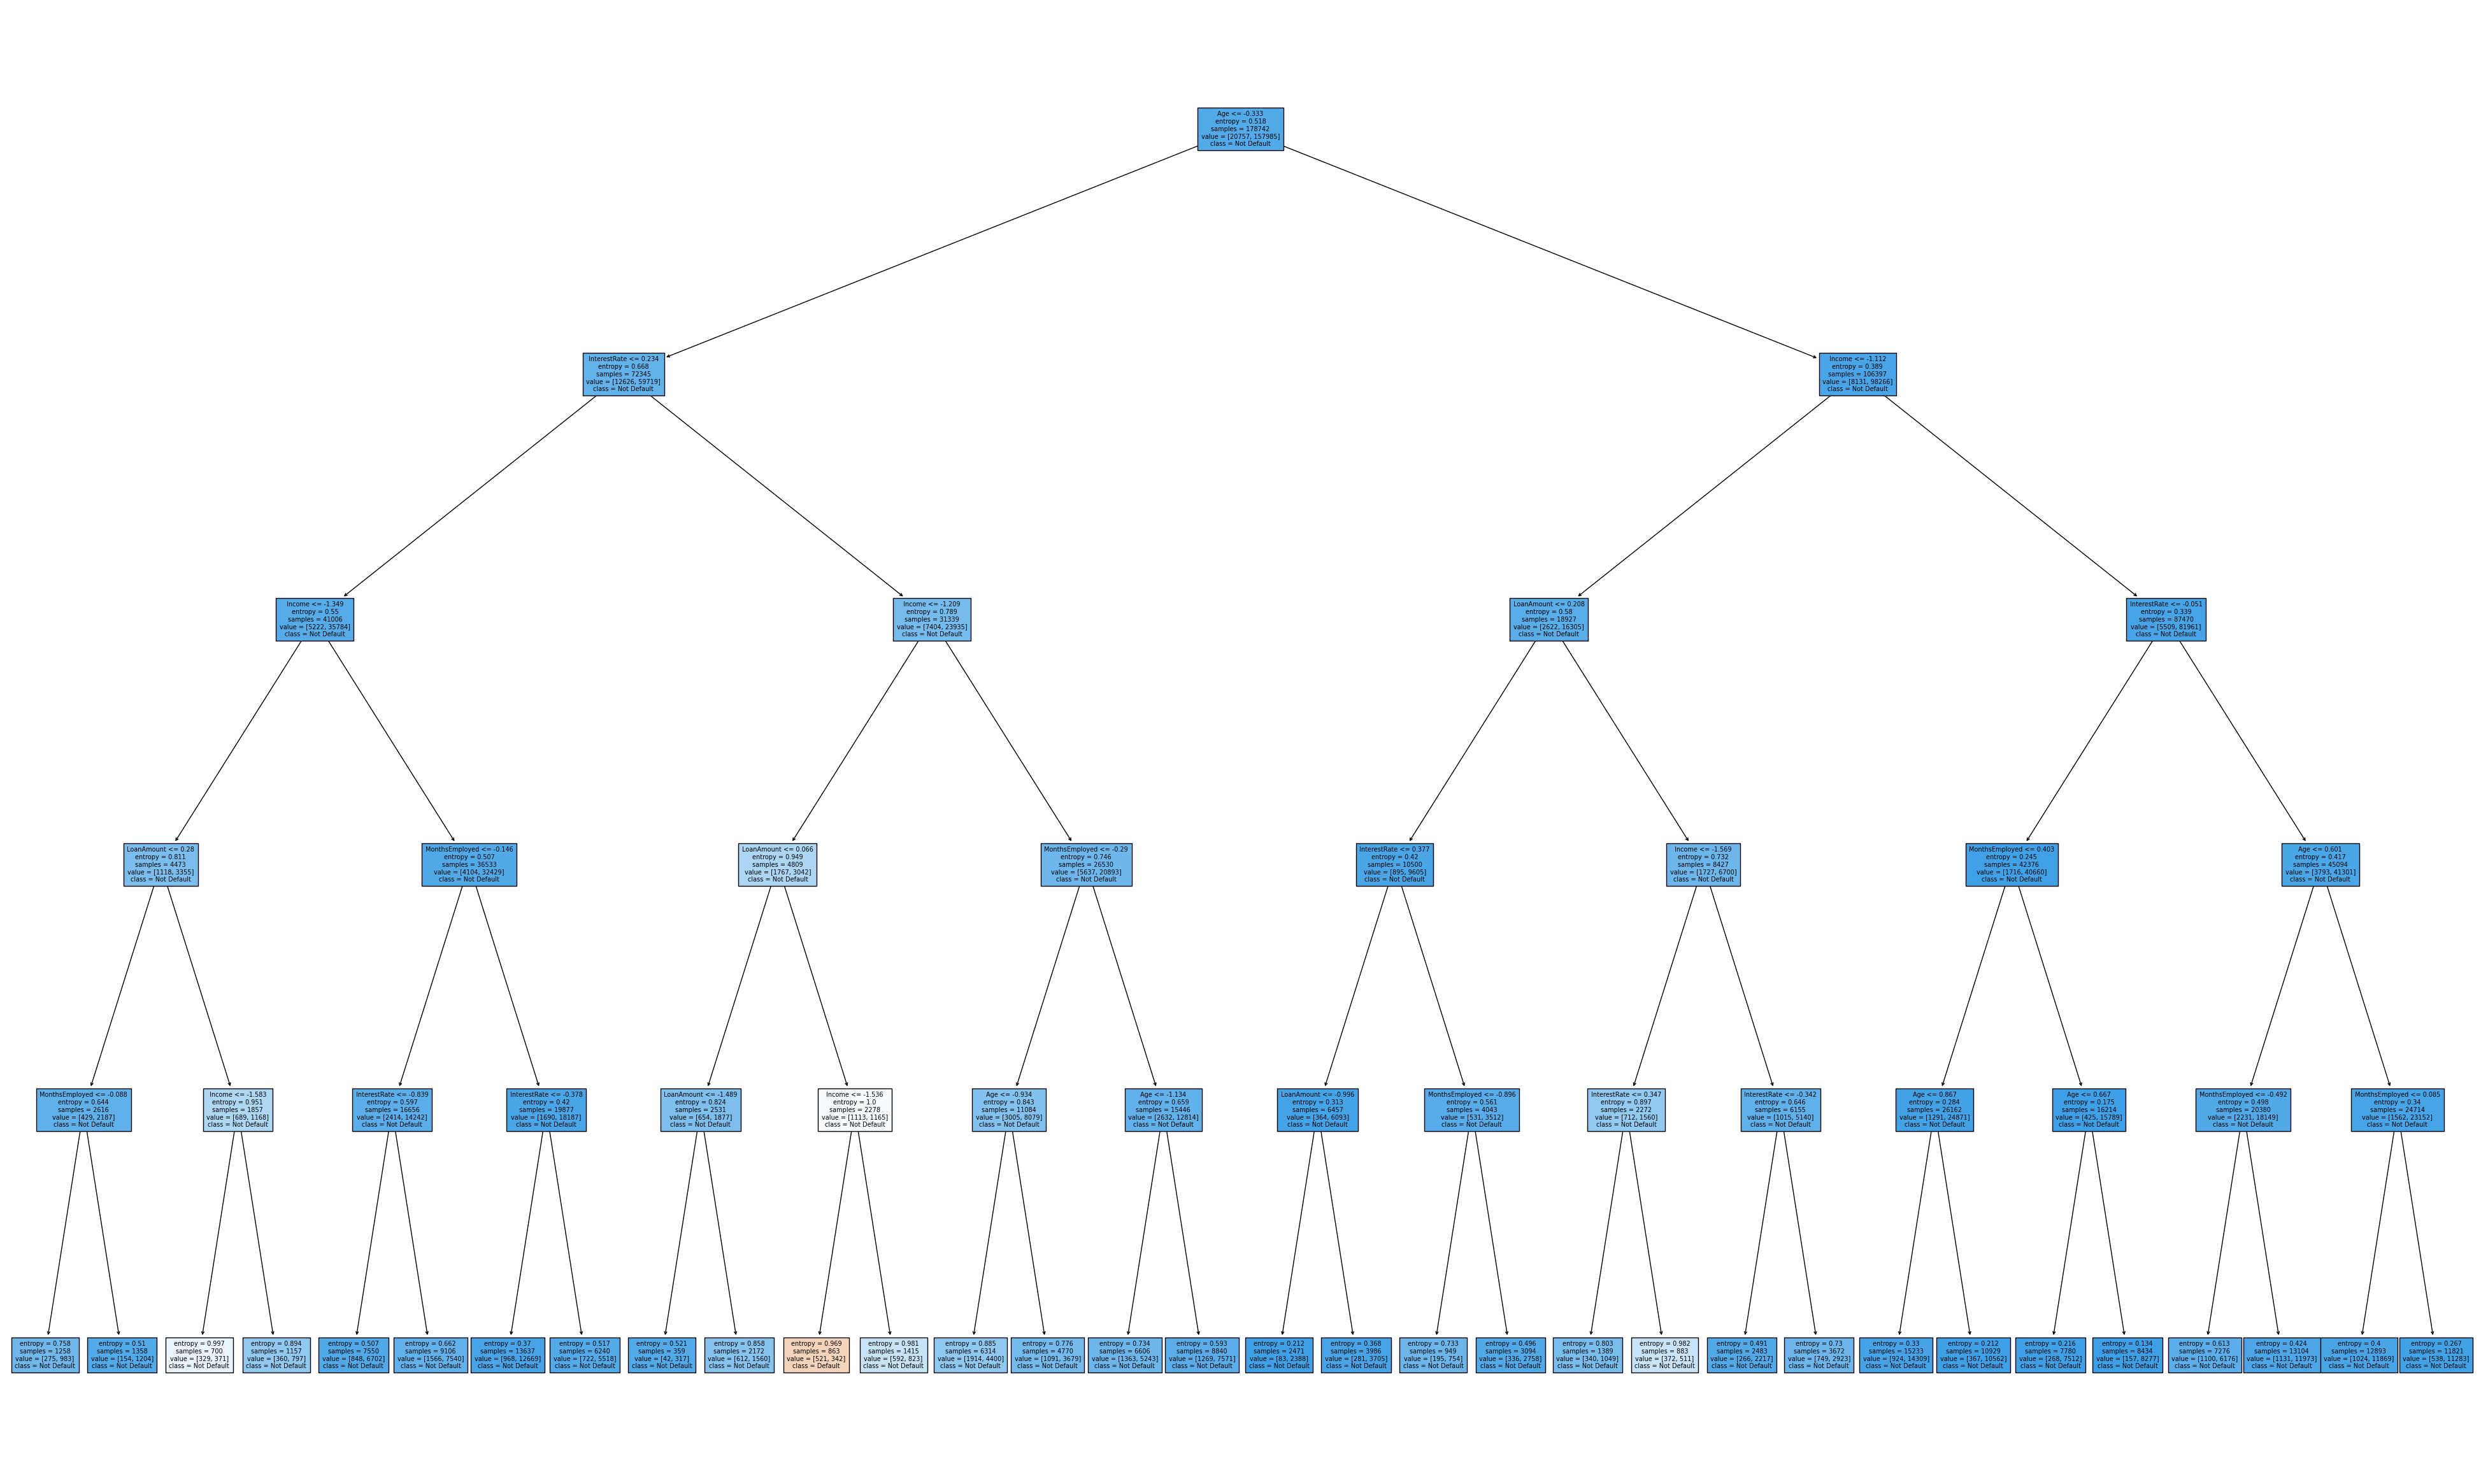

In [ ]:
featureNames = df3.columns

fig = plt.figure(figsize = (50, 30))
tree.plot_tree(dectree_hypetune,
                       feature_names=featureNames,
                       class_names=['Default', 'Not Default'],
                       fontsize=7,
                       filled=True)

plt.savefig('decision tree.png')

##ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(dectree, n_estimators=50, random_state=SEED)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1,
                                                    random_state=42),
                   random_state=42)

In [ ]:
y_adaboost_1 = adaboost.predict(X_val)
acc = accuracy_score(y_val, y_adaboost_1)
f1 = f1_score(y_val, y_adaboost_1)
roc_auc = roc_auc_score(y_val, adaboost.predict_proba(X_val)[:, 1])

print("accuracy score: ", acc)
print("f1 score: ", f1)
print("ROC-AUC score: ", roc_auc)

accuracy score:  0.885542719143659
f1 score:  0.938908320675576
ROC-AUC score:  0.7460650863364604


In [ ]:
result.append(['AdaBoost', acc, f1, roc_auc])
result

[['Decision Tree', 0.8838718099340774, 0.9383566389955237, 0.6150155047836962],
 ['Decision Tree with HyperTune',
  0.8848247503426669,
  0.938701497203599,
  0.7134008376714422],
 ['AdaBoost', 0.885542719143659, 0.938908320675576, 0.7460650863364604]]

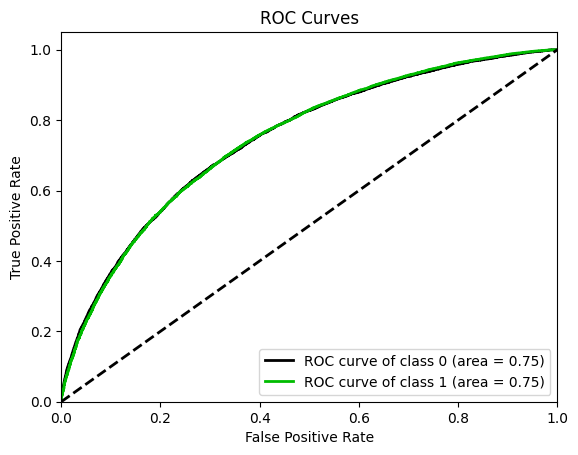

In [ ]:
skplt.metrics.plot_roc(y_val, adaboost.predict_proba(X_val),
                       plot_micro=False, plot_macro=False)
plt.show()

In [ ]:
cv_results1 = cross_validate(adaboost,
                            X_train, y_train.values.ravel(),
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
cv_results1

{'fit_time': array([11.42928243, 12.34337521, 10.01797509,  9.82491779, 10.66124463]),
 'score_time': array([0.70214319, 0.47768354, 0.69315219, 0.48910379, 0.47215176]),
 'test_accuracy': array([0.88595485, 0.88542337, 0.88572787, 0.88542016, 0.88583977]),
 'test_f1': array([0.93915198, 0.93882001, 0.93900527, 0.93884011, 0.93908501]),
 'test_roc_auc': array([0.74964708, 0.74569229, 0.74460874, 0.75268423, 0.74279345])}

In [ ]:
print(f"Nilai akurasi rata-rata cross-validation: {cv_results1['test_accuracy'].mean()}")
print(f"Nilai f1 rata-rata cross-validation: {cv_results1['test_f1'].mean()}")
print(f"Nilai roc-auc rata-rata cross-validation: {cv_results1['test_roc_auc'].mean()}")

Nilai akurasi rata-rata cross-validation: 0.8856732047766567
Nilai f1 rata-rata cross-validation: 0.93898047652328
Nilai roc-auc rata-rata cross-validation: 0.747085158706928


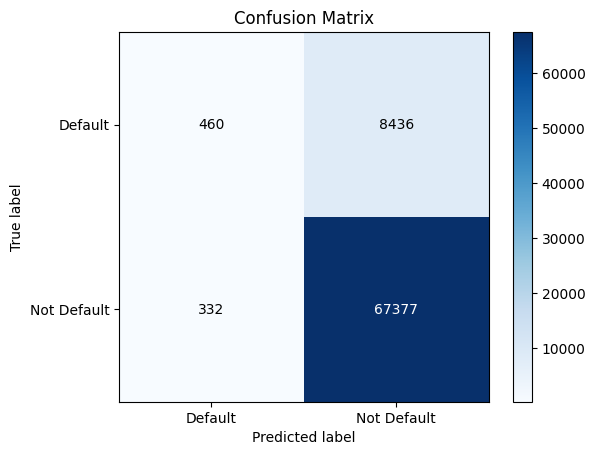

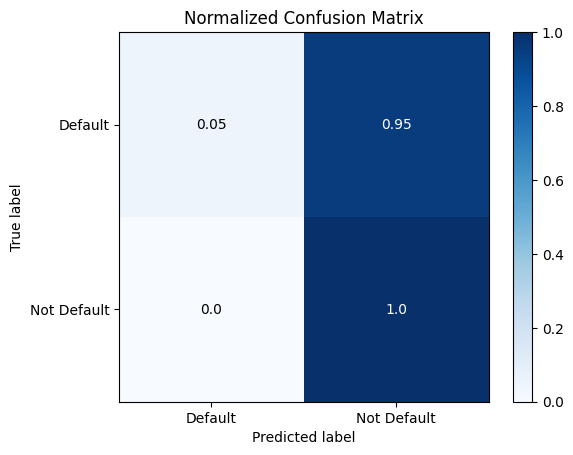

In [ ]:
y_adaboost_1_reverse = le2.inverse_transform(y_adaboost_1)

skplt.metrics.plot_confusion_matrix(y_val_reverse, y_adaboost_1_reverse, normalize=False)
plt.show()
skplt.metrics.plot_confusion_matrix(y_val_reverse, y_adaboost_1_reverse, normalize=True)
plt.show()

## Hyperparameter tuning AdaBoost

In [ ]:
y_train.values.ravel()

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
adaboost3 = AdaBoostClassifier(dectree, random_state=SEED)
parameters = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'learning_rate' : [0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(adaboost3, parameters, n_jobs = -1, cv = 3, verbose = 1, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_params_)

{'learning_rate': 0.5, 'n_estimators': 100}


In [ ]:
# summarize all scores that were evaluated
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
grid_search_result = pd.DataFrame([means, stds, params]).T
grid_search_result = grid_search_result.rename(columns = {0:"mean_test_score", 1:"std_test_score", 2:'params'})
grid_search_result

,mean_test_score,std_test_score,params
0,0.883872,0.000001,"{'learning_rate': 0.01, 'n_estimators': 100}"
1,0.883872,0.000001,"{'learning_rate': 0.01, 'n_estimators': 200}"
2,0.883872,0.000001,"{'learning_rate': 0.01, 'n_estimators': 300}"
3,0.883872,0.000001,"{'learning_rate': 0.01, 'n_estimators': 400}"
4,0.883872,0.000001,"{'learning_rate': 0.01, 'n_estimators': 500}"
5,0.884,0.000034,"{'learning_rate': 0.1, 'n_estimators': 100}"
6,0.884767,0.00007,"{'learning_rate': 0.1, 'n_estimators': 200}"
7,0.885421,0.000056,"{'learning_rate': 0.1, 'n_estimators': 300}"
8,0.88583,0.000202,"{'learning_rate': 0.1, 'n_estimators': 400}"
9,0.886009,0.00013,"{'learning_rate': 0.1, 'n_estimators': 500}"


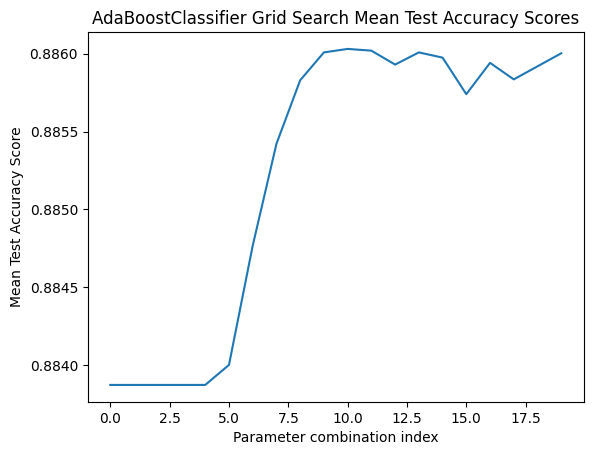

In [ ]:
plt.plot(grid_search_result['mean_test_score'])
plt.xlabel('Parameter combination index')
plt.ylabel('Mean Test Accuracy Score')
plt.title('AdaBoostClassifier Grid Search Mean Test Accuracy Scores')
plt.show()

In [ ]:
adaboost_3_hypetune = AdaBoostClassifier(
    dectree, **grid_search.best_params_, random_state=SEED
)

adaboost_3_hypetune.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [ ]:
y_adaboost_3_hypetune = adaboost_3_hypetune.predict(X_val)
acc = accuracy_score(y_val, y_adaboost_3_hypetune)
f1 = f1_score(y_val, y_adaboost_3_hypetune)
roc_auc = roc_auc_score(y_val, adaboost_3_hypetune.predict_proba(X_val)[:, 1])

print("accuracy score: ", acc)
print("f1 score: ", f1)
print("ROC-AUC score: ", roc_auc)

accuracy score:  0.8857515827948568
f1 score:  0.9390809238093912
ROC-AUC score:  0.749050761698311


In [ ]:
result.append(['AdaBoost with HyperTune', acc, f1, roc_auc])
result

[['Decision Tree', 0.8838718099340774, 0.9383566389955237, 0.6150155047836962],
 ['Decision Tree with HyperTune',
  0.8848247503426669,
  0.938701497203599,
  0.7134008376714422],
 ['AdaBoost', 0.885542719143659, 0.938908320675576, 0.7460650863364604],
 ['AdaBoost with HyperTune',
  0.8857515827948568,
  0.9390809238093912,
  0.749050761698311]]

In [ ]:
cv_results3 = cross_validate(adaboost_3_hypetune,
                            X_train, y_train.values.ravel(),
                            cv=3,
                            scoring=["accuracy", "f1", "roc_auc"])
cv_results3

{'fit_time': array([30.13316011, 17.12140989, 18.98319817]),
 'score_time': array([1.51741457, 2.1102984 , 1.52938461]),
 'test_accuracy': array([0.88578574, 0.88630604, 0.88600201]),
 'test_f1': array([0.93911332, 0.93936519, 0.93920407]),
 'test_roc_auc': array([0.75155736, 0.75041585, 0.75043067])}

In [ ]:
print(f"Nilai akurasi rata-rata cross-validation: {cv_results3['test_accuracy'].mean()}")
print(f"Nilai f1 rata-rata cross-validation: {cv_results3['test_f1'].mean()}")
print(f"Nilai roc-auc rata-rata cross-validation: {cv_results3['test_roc_auc'].mean()}")

Nilai akurasi rata-rata cross-validation: 0.8860312627740058
Nilai f1 rata-rata cross-validation: 0.9392275242845027
Nilai roc-auc rata-rata cross-validation: 0.7508012913877428


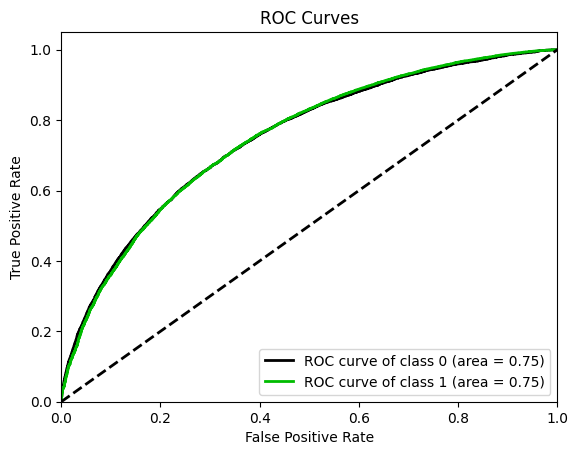

In [ ]:
skplt.metrics.plot_roc(y_val, adaboost_3_hypetune.predict_proba(X_val),
                       plot_micro=False, plot_macro=False)
plt.show()

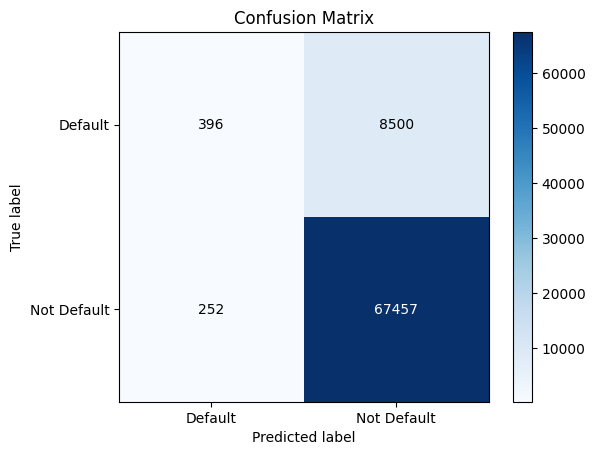

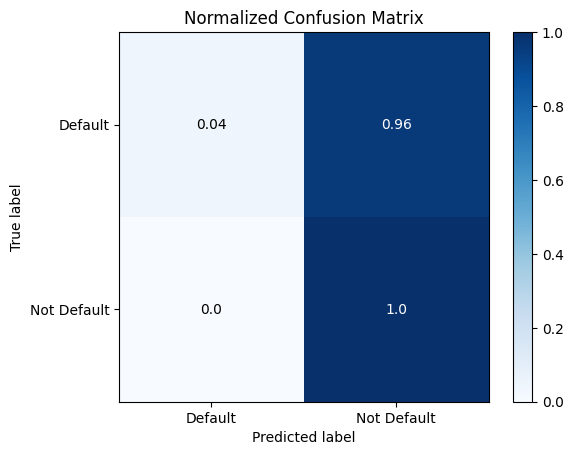

In [ ]:
y_adaboost_3_reverse = le2.inverse_transform(y_adaboost_3_hypetune)

skplt.metrics.plot_confusion_matrix(y_val_reverse, y_adaboost_3_reverse, normalize=False)
plt.show()
skplt.metrics.plot_confusion_matrix(y_val_reverse, y_adaboost_3_reverse, normalize=True)
plt.show()

In [ ]:
df_result = pd.DataFrame(result, columns =['model', 'accuracy score', 'f1 score', 'ROC-AUC score'])
df_result

,model,accuracy score,f1 score,ROC-AUC score
0,Decision Tree,0.883872,0.938357,0.615016
1,Decision Tree with HyperTune,0.884825,0.938701,0.713401
2,AdaBoost,0.885543,0.938908,0.746065
3,AdaBoost with HyperTune,0.885752,0.939081,0.749051


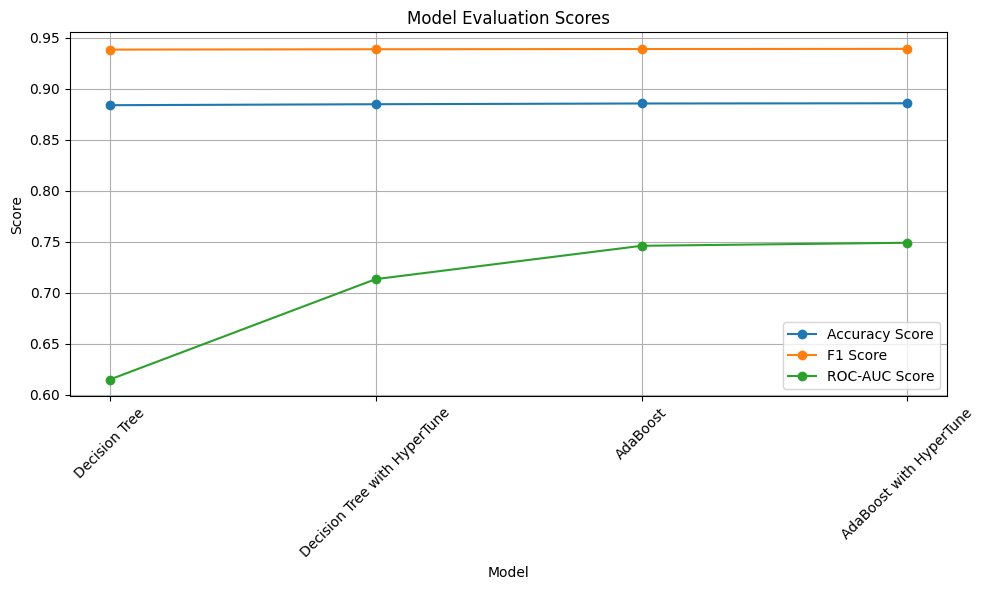

In [ ]:
# Plot lines
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(df_result['model'], df_result['accuracy score'], marker='o', label='Accuracy Score')

# Plot F1 scores
plt.plot(df_result['model'], df_result['f1 score'], marker='o', label='F1 Score')

# Plot ROC-AUC scores
plt.plot(df_result['model'], df_result['ROC-AUC score'], marker='o', label='ROC-AUC Score')

# Add title and labels
plt.title('Model Evaluation Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

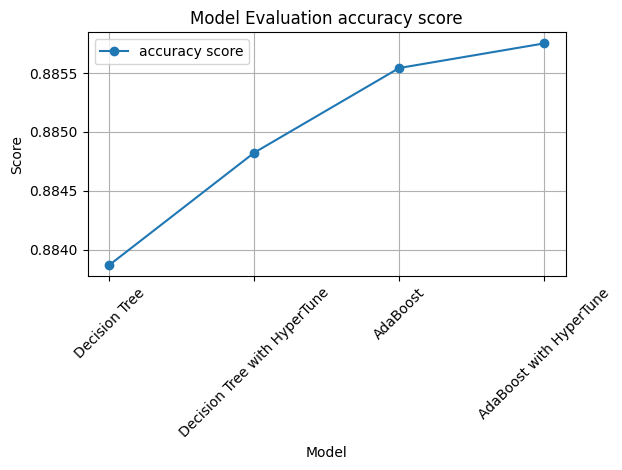

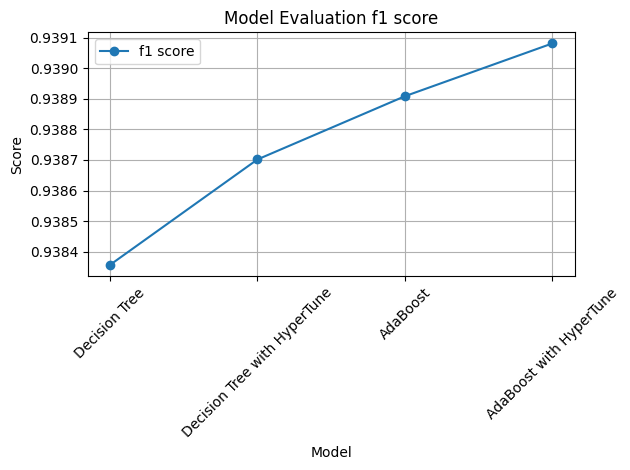

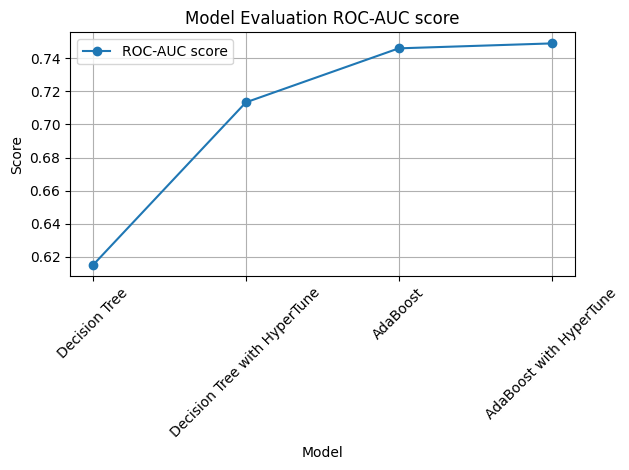

In [ ]:
for i in ['accuracy score', 'f1 score', 'ROC-AUC score']:
  # Plot accuracy scores
  plt.plot(df_result['model'], df_result[i], marker='o', label=i)

  # Plot F1 scores
  #plt.plot(df_result['model'], df_result['f1 score'], marker='o', label='F1 Score')

  # Plot ROC-AUC scores
  #plt.plot(df_result['model'], df_result['ROC-AUC score'], marker='o', label='ROC-AUC Score')

  # Add title and labels
  plt.title(f'Model Evaluation {i}')
  plt.xlabel('Model')
  plt.ylabel('Score')
  plt.xticks(rotation=45)
  plt.grid(True)

  # Add legend
  plt.legend()

  # Show plot
  plt.tight_layout()
  plt.show()